In [8]:
from natorch.utils.io import load_model
from natorch.nn.models import AutoEncoder
from natorch.utils.data import train_test_split, one_hot
from natorch.utils.metrics import accuracy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
autoencoder = AutoEncoder(latent_dim=64)

Re-initialize parameters


In [10]:
load_model(autoencoder, save_dir = '../../checkpoints/autoencoder', file_name = 'checkpoint_epoch_30')

In [11]:
data_path = '../../data/MNIST/MNIST.csv'
data = pd.read_csv(data_path)

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()
X = X/255.0

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_test.shape, y_test.shape

((8400, 784), (8400,))

In [12]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
x_train.shape, x_test.shape

((33600, 1, 28, 28), (8400, 1, 28, 28))

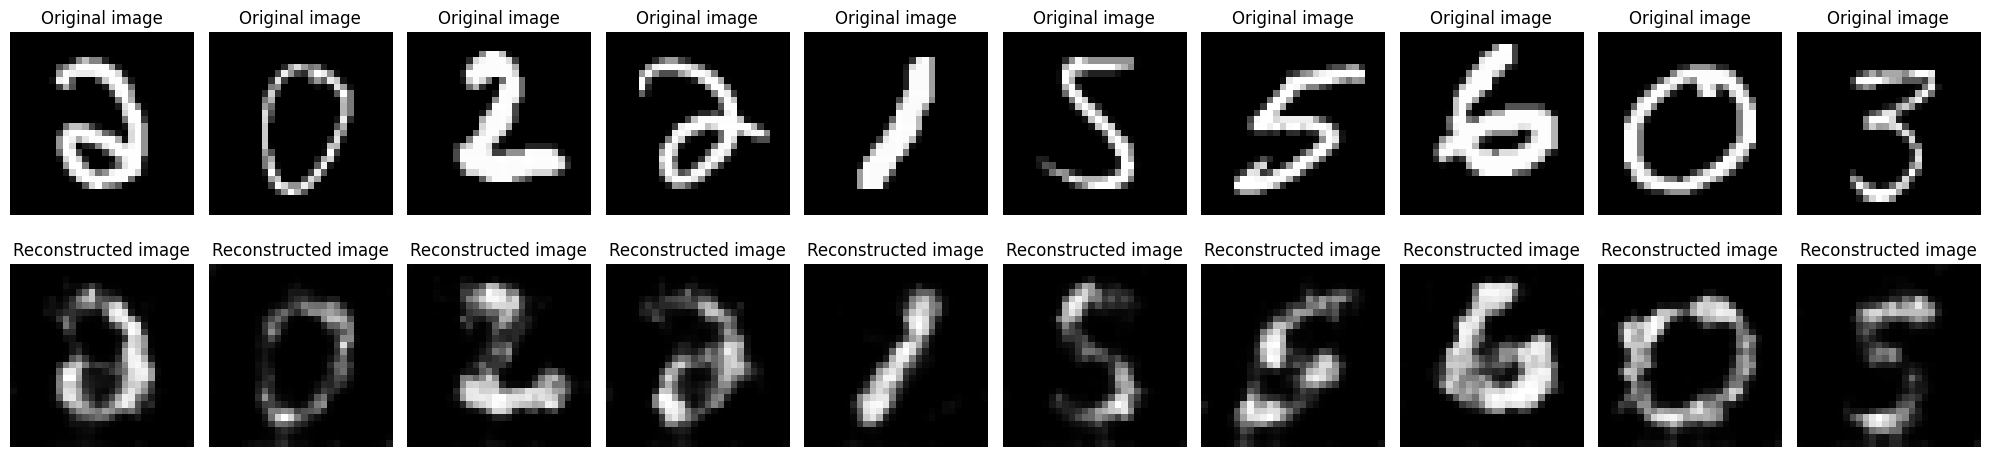

In [13]:
def plot_sample(num_sample=10):
    plt.figure(figsize=(20, 5))
    
    x_test_sample = x_test[:num_sample, :]
    
    outputs = []
    origins = []
    for i in x_test_sample:
        origins.append(i.reshape(28, 28))
    reconstructed_img_sample = autoencoder.forward(x_test_sample)
    for i in reconstructed_img_sample:
        outputs.append(i.reshape(28, 28))
    for i in range(num_sample):
        ax = plt.subplot(2, num_sample, i + 1)
        plt.title("Original image")
        plt.imshow(origins[i], cmap='gray')
        plt.axis("off")
        
        ax = plt.subplot(2, num_sample, i + 1 + num_sample)
        plt.title("Reconstructed image")
        plt.imshow(outputs[i], cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.show()
        
plot_sample(10)